# Case Study: IBM Employee Attrition Prediction

<img src="https://github.com/ijoseff/ijoseff.github.io/blob/master/assets/img/portfolio/employee.png?raw=truee" width="500" height="250" />

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study:-IBM-Employee-Attrition-Prediction" data-toc-modified-id="Case-Study:-IBM-Employee-Attrition-Prediction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study: IBM Employee Attrition Prediction</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libraries-and-Data-Importation" data-toc-modified-id="Libraries-and-Data-Importation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Libraries and Data Importation</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Data-Pre-processing" data-toc-modified-id="Data-Pre-processing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Pre-processing</a></span></li><li><span><a href="#Model-Creation" data-toc-modified-id="Model-Creation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Creation</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

Employee Attrition is the gradual reduction in staff numbers that occurs as employees retire or resign and are not replaced. Employee attrition can be costly for businesses. The company loses employee productivity, and employee knowledge. In this project, it will show you how to predict if an employee is likely to leave the company.

**Problem:**
 - Uncover the factors that lead to employee attrition
 
**Dataset:**
 - The Attrition dataset had 1470 observations with 35 variables. Out of the 35 variables, there exists one target variable Attrition with possible outcomes Yes and No. The other 34 variables are independent variables but one, that was, Employee Number which denotes the employee number or the identification number.

**Source:** This is a fictional data set created by IBM data scientists.

# Libraries and Data Importation

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Import data
df = pd.read_csv('project_data/employee.csv')

# Data Exploration

In [4]:
# Check dataframe
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# View data statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Check more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Check dataframe dimension
df.shape

(1470, 35)

In [8]:
# Check for any missing or null values in the data
df.isnull().values.any()

False

In [9]:
# Print all of the data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('----------------------------------------------------------')

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
----------------------------------------------------------
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
----------------------------------------------------------
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
----------------------------------------------------------
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
----------------------------------------------------------
Gender:['Female' 'Male']
Male      882
Fema

# Data Visualization

In [10]:
# Get a count of numbers of employee that stayed and left the company
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

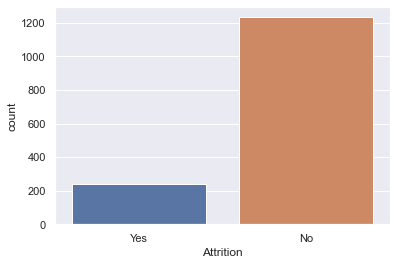

In [11]:
# Visualize the number of employees that stayed and left the company
sns.countplot(df['Attrition'])
plt.show()

In [12]:
# This is the percentage if we just guessed 'NO'.
print('This is the percentage if we just guessed NO:', ((1233 - 237) / 1233),'%')

This is the percentage if we just guessed NO: 0.8077858880778589 %


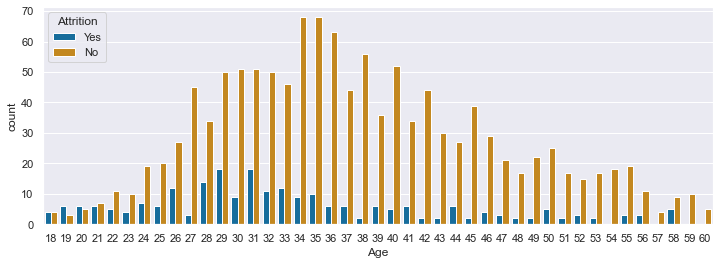

In [13]:
# Show the number of employees that left and stayed by their age
plt.subplots(figsize = (12, 4))
sns.countplot(x = 'Age', hue = 'Attrition', data = df, palette = 'colorblind')
plt.show()

# Data Pre-processing

In [14]:
# Remove some useless columns
df = df.drop('Over18', axis = 1)
df = df.drop('EmployeeNumber', axis = 1)
df = df.drop('StandardHours', axis = 1)
df = df.drop('EmployeeCount', axis = 1)

In [15]:
# Convert all the non-numeric columns to numeric

# Import library
from feature_engine import categorical_encoders as ce

# Set up the encoder
encoder = ce.OrdinalCategoricalEncoder(encoding_method='arbitrary', variables = None)

# fit the encoder
encoder.fit(df)

# transform the data
cleaned_df = encoder.transform(df)

In [16]:
# Check the dataframe
cleaned_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,2,1,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,0,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,1,1,...,3,4,1,6,3,3,2,2,2,2


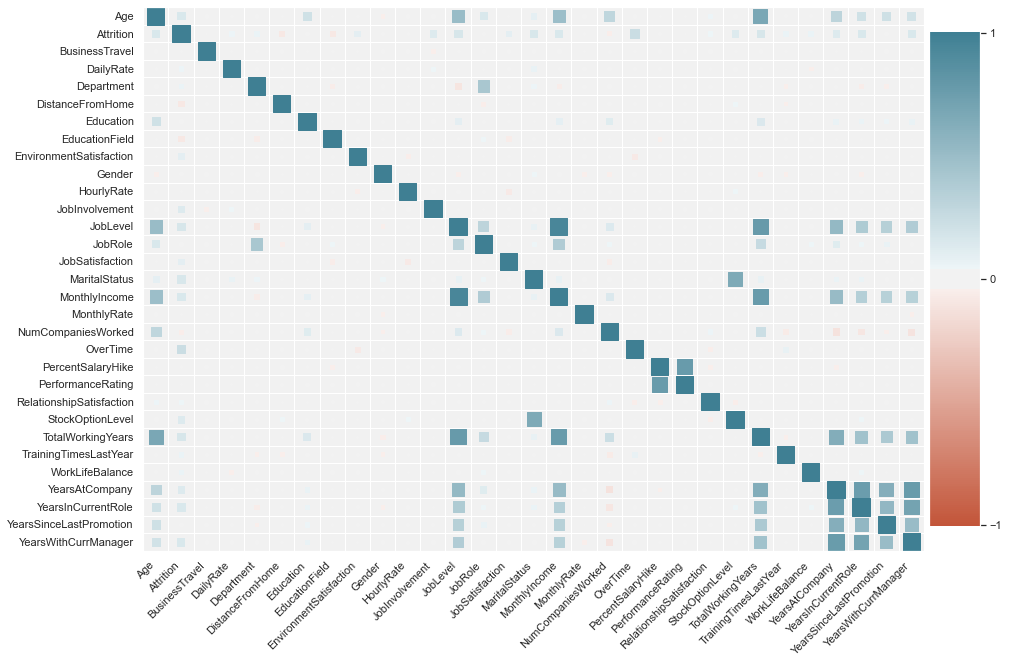

In [17]:
# Check correlation in the features by using heatmap
from heatmap import corrplot
plt.figure(figsize=(15, 10))
corrplot(cleaned_df.corr(), size_scale=300)
plt.show()

In [18]:
# label the independent and dependent variables
x = cleaned_df.drop('Attrition', axis = 1)
y = cleaned_df['Attrition']

# Scaled the data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x)

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state= 0)

# Model Creation

In [19]:
# Create Machine Learning models
def models(X_train, y_train):
    
    # Use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(max_depth= 100, criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
    
    # Use RandomforestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=20, max_depth= 100, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
    
    # Use XGBoost Classifer
    from xgboost import XGBClassifier
    xgb = XGBClassifier(n_jobs = 20, max_depth = 100)
    xgb.fit(X_train, y_train)
    
    # Print the training accuracy for each model
    print('model[0] Decision Tree  Training Accuracy: ', tree.score(X_train, y_train))
    print('model[1] Random Forest Training Accuracy: ', forest.score(X_train, y_train))
    print('model[2] XGBoost Training Accuracy: ', xgb.score(X_train, y_train))
    
    return tree, forest, xgb

# Model Evaluation

In [20]:
# Show Training accuracy score
model = models(X_train, y_train)

model[0] Decision Tree  Training Accuracy:  1.0
model[1] Random Forest Training Accuracy:  0.9963702359346642
model[2] XGBoost Training Accuracy:  1.0


In [21]:
# Show the confusion matrix and accuracy for all the models on the test data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

for i in range( len(model) ):
    cm = confusion_matrix(y_test, model[i].predict((X_test)))
    
    # Extract TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
    
    test_score = (TP + TN) / (TN + FP + FN + TP)
    
    print('model[{}] Testing Accuracy: "{}"'.format(i, test_score))

model[0] Testing Accuracy: "0.7907608695652174"
model[1] Testing Accuracy: "0.8614130434782609"
model[2] Testing Accuracy: "0.875"


In [22]:
# Import library
from sklearn.metrics import classification_report

# Check classification report
for i in range( len(model) ):
    # Create a predicitions
    predictions = model[i].predict(X_test)

    #Check precision, recall, f1-score
    print('model[{}]:'.format(i))
    print( classification_report(y_test, predictions) )
    print('---------------------------------------------------')

model[0]:
              precision    recall  f1-score   support

           0       0.33      0.31      0.32        58
           1       0.87      0.88      0.88       310

    accuracy                           0.79       368
   macro avg       0.60      0.60      0.60       368
weighted avg       0.79      0.79      0.79       368

---------------------------------------------------
model[1]:
              precision    recall  f1-score   support

           0       0.71      0.21      0.32        58
           1       0.87      0.98      0.92       310

    accuracy                           0.86       368
   macro avg       0.79      0.60      0.62       368
weighted avg       0.84      0.86      0.83       368

---------------------------------------------------
model[2]:
              precision    recall  f1-score   support

           0       0.71      0.34      0.47        58
           1       0.89      0.97      0.93       310

    accuracy                           0.88     

In [23]:
# Implement-Fold Cross Validation
for i in range( len(model) ):
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model[i], X = X_train, y = y_train, cv = 3)
    print('model[{}] Mean Accuracy:'.format(i), accuracies.mean())
    print('model[{}] Standard Deviation:'.format(i), accuracies.std())
    print('---------------------------------------------------')

model[0] Mean Accuracy: 0.7967188919164396
model[0] Standard Deviation: 0.011214236698029519
---------------------------------------------------
model[1] Mean Accuracy: 0.859339829404099
model[1] Standard Deviation: 0.00530895536757465
---------------------------------------------------
model[2] Mean Accuracy: 0.855721577222288
model[2] Standard Deviation: 0.005762382422046279
---------------------------------------------------


In [24]:
# Get the best model
UsedFitter = model[2]

# Create confusion matrix
y_predict = UsedFitter.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

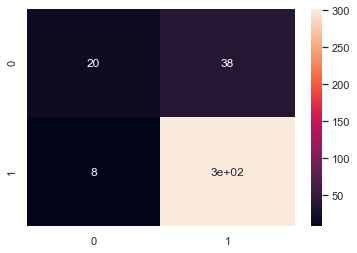

In [25]:
# Visualize confusion matrix
sns.heatmap(cm, annot=True)
plt.show()

In [26]:
# Get feature importance
importances = pd.DataFrame({'feature': x.columns, 'importance': np.round(UsedFitter.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
print(importances.head(10))

                         importance
feature                            
JobLevel                      0.107
OverTime                      0.062
MaritalStatus                 0.054
StockOptionLevel              0.050
YearsWithCurrManager          0.047
TotalWorkingYears             0.047
YearsSinceLastPromotion       0.046
MonthlyIncome                 0.037
EnvironmentSatisfaction       0.036
EducationField                0.035


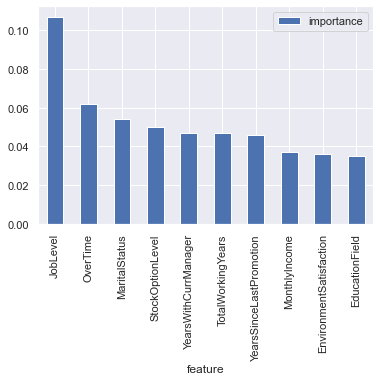

In [27]:
# Visualize the importance
importances.head(10).plot.bar()
plt.show()

# Conclusion

Job level appears to be the most important feature followed by the over time, marital status, and stock option level. Seeing this result makes it would be better to check if people with a higher job level are less likely to leave than someone with a lower job level. The model (XGBoost) were able to obtained 86% accuracy. Maybe with some more analysis on the data and tweaking of the program, this can improve the model performance and accuracy score.